In [1]:
import numpy as np

In [2]:
import matplotlib
import matplotlib.pyplot as plt

In [3]:
import galaxy_dive
import galaxy_dive.analyze_data.particle_data as p_data

# About
This notebook is a minimal example for getting started with FIRE data.
For a more in-depth example, please see the [gizmo_tutorial](https://bitbucket.org/awetzel/gizmo_analysis/src/master/gizmo_tutorial.ipynb) notebook.

# Load data

In [4]:
# Import the main analysis module
import gizmo_analysis as gizmo

In [5]:
# Choose the simulation directory
sdir = '/Users/zhafen/FIRE_analysis/m12i_res7100/output'
snum = 600

In [6]:
data = p_data.ParticleData(
    sdir,
    snum,
    4,
    halo_data_dir = '/Users/zhafen/FIRE_analysis/m12i_res7100/halo/ahf',
)

In [7]:
# This is distance to the center of the central galaxy
distance_to_center = part['dark'].prop( 'host.distance.total' )

NameError: name 'part' is not defined

In [ ]:
# An approximate definition for being in the galaxy: particles within 10 kpc of the center
is_in_halo = distance_to_center < 250.

In this minimal example the main galaxy is identified via an iterative zoom.
The in-depth tutorial discusses more-robust alternatives.

It is also possible to retrieve data from a halo finder. For details, please see the [halo_analysis tutorial](https://bitbucket.org/awetzel/halo_analysis/src/master/halo_tutorial.ipynb).

# A simple image of the main galaxy
Using a 2D histogram is a trick to get a rough image of a galaxy or its surroundings.

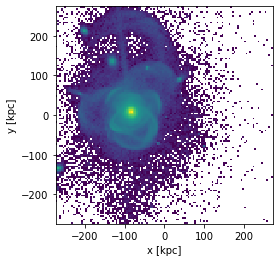

In [8]:
fig = plt.figure()
ax = plt.gca()

bins = np.linspace( -data.r_vir, data.r_vir, 128 )

ax.hist2d(
    data.get_data( 'Rx' ),
    data.get_data( 'Ry' ),
    bins = [ bins, bins],
    norm = matplotlib.colors.LogNorm(),
)
ax.set_xlim( -data.r_vir, data.r_vir )
ax.set_ylim( -data.r_vir, data.r_vir )

ax.set_xlabel( r'x [kpc]' )
ax.set_ylabel( r'y [kpc]' )

ax.set_aspect( 'equal' )

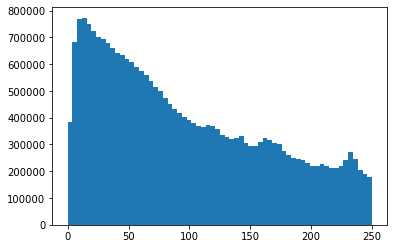

In [16]:
# Mass profile

fig = plt.figure()
ax = plt.gca()

hist, edges, img = ax.hist(
    distance_to_center[is_in_halo],
    bins = 64,
)